**1. Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**2. Loading dataset**

In [2]:
Insurance = pd.read_csv("insurance.csv")

In [3]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Chúng ta có 5 dòng đầu tiên của *Dataset* để quan sát và hiểu chúng. Chúng ta sẽ đi dự đoán 'charges', nên 'charges' thành mục tiêu và các cột còn lại là các *feature*.

Kiểm tra số dòng và số cột trong *Dataset* này.

In [4]:
Insurance.shape

(1338, 7)

Thông tin về *Dataset*. Để lấy được thông tin về *Dataset*, ví dụ như kiểu dữ liệu của từng cột, chúng ta sẽ sử dụng code dưới đây.

In [5]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Kiểm tra thống kê mô tả của *Dataset*.

In [6]:
Insurance.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Thống kê mô tả cho các cột biến dữ liệu kiểu số sẽ như sau:

- Age: Dao động từ 18 tuổi tới 64 tuổi, trung bình độ tuổi xấp xỉ 39.

- BMI: Dao động từ 15.96 cho tới 53.13, trung bình của BMI khoảng 30.7.

- Children: Dao động từ 0 cho tới 5, trung bình của Children xấp xỉ 1.1.

- Charges: Chi phí bảo hiểm thay đổi rất đáng chú ý, dao động từ 1121.87 cho tới 63770.43, với trung bình xấp xỉ 13270.42.

Chúng ta biết được rằng các biến phân loại sẽ không có một số dữ liệu kiểu mô tả số và ngược lại, các biến dữ liệu kiểu số sẽ không có một số dữ liệu kiểu phân loại. Do đó, chúng ta có 3 biến dữ liệu phân loại trong Dataset này: Sex, Smoker, và Region. 

Làm việc với *Dataset* "không sạch" sẽ dẫn tới kết quả sai lệch, không chính xác. Do đó, "làm sạch" *Dataset* trước khi phân tích và dự đoán là điều cần thiết.
- Kiếm tra có giá trị null không.

In [7]:
Insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

- Kiểm tra có giá trị bị nhân đôi không.

In [8]:
Insurance.duplicated().any()

True

Dataset không có giá trị null, nhưng có giá trị bị nhân đôi.
Để được data sạch, chúng ta cần phải loại bỏ các giá trị bị nhân đôi trong *Dataset* này.

***3. Data Exploration***

Hiển thị hàm phân phối xác suất của một biến dữ liệu là một bước khám phá dữ liệu tuyệt vời. Chúng ta sẽ thấy được biến dữ liệu được biểu diễn như thế nào trong hàm phân phối xác suất (PDF). Điều này giúp chúng ta phát hiện các ngoại lệ, những bất thường trong *Dataset* trở nên dễ dàng hơn. Thông thường, PDF cũng đóng vai trò như nền tảng cho quyết định của chúng ta về việc có nên thay đổi một *feature* hay không.

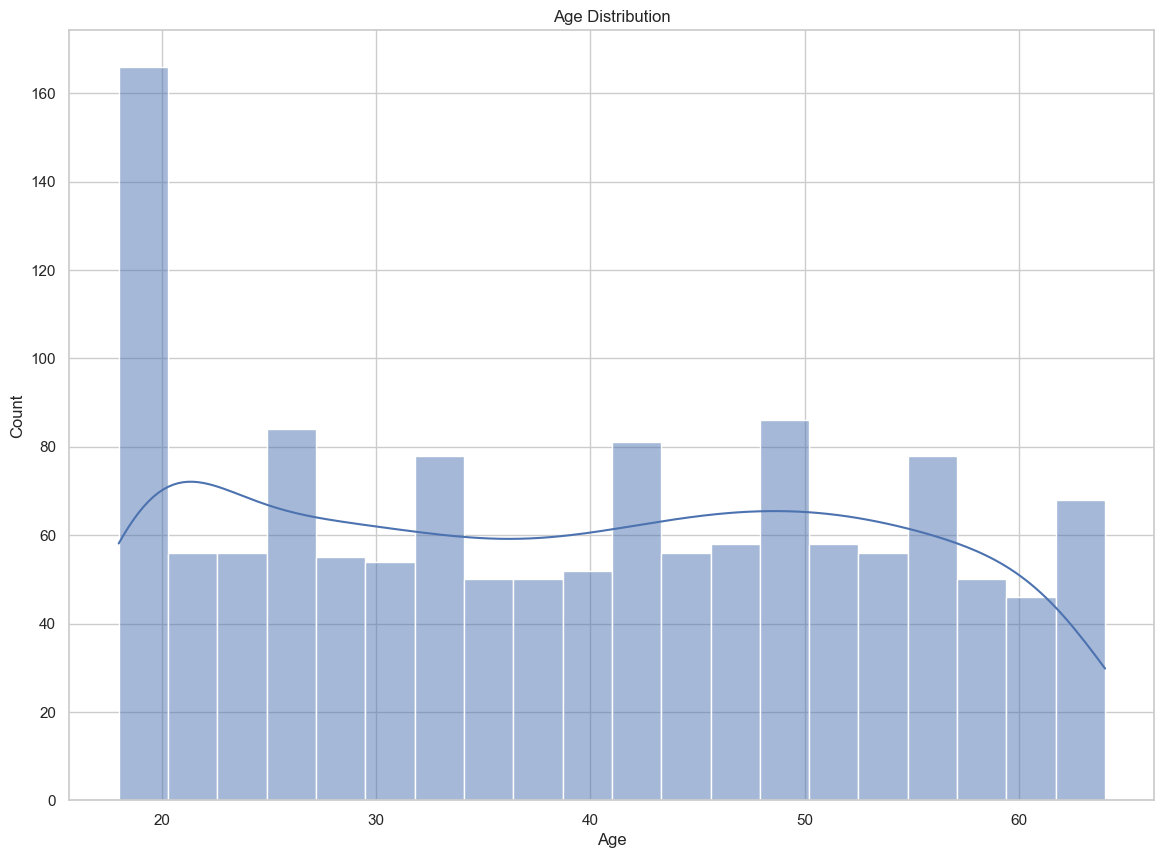

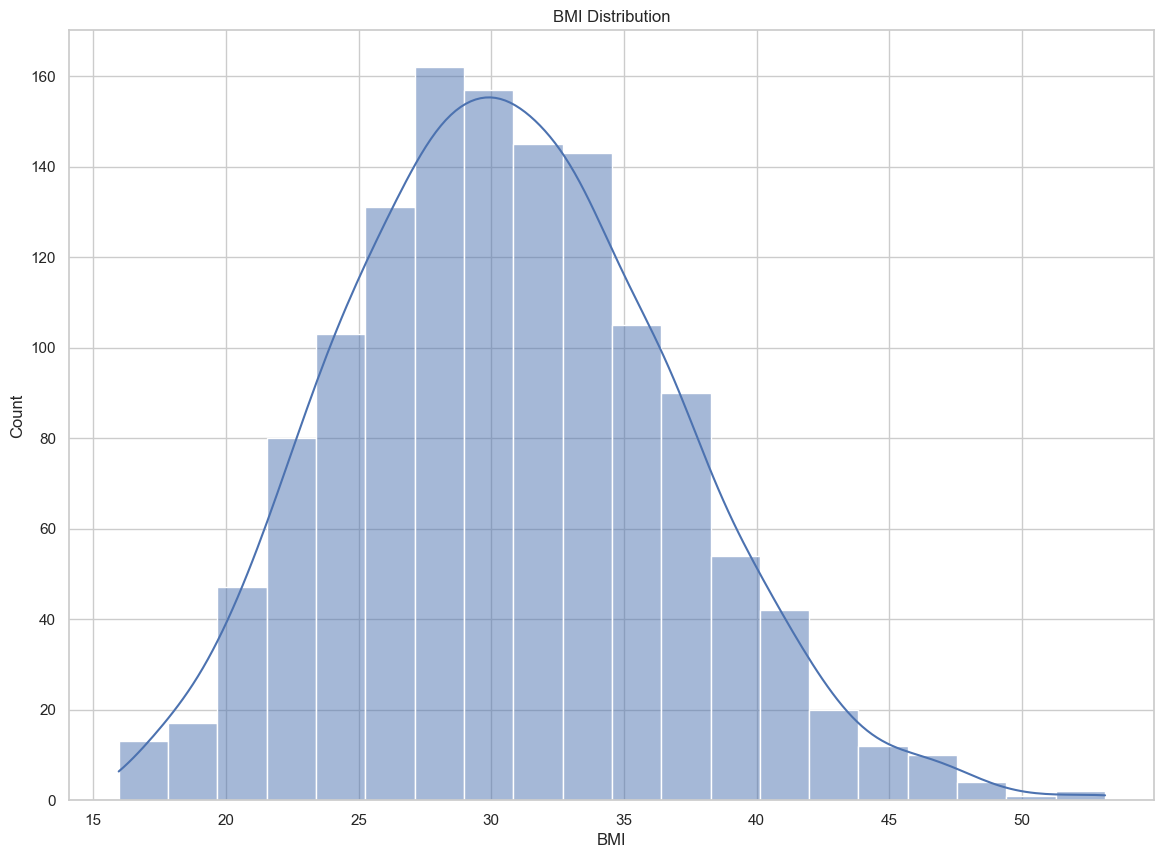

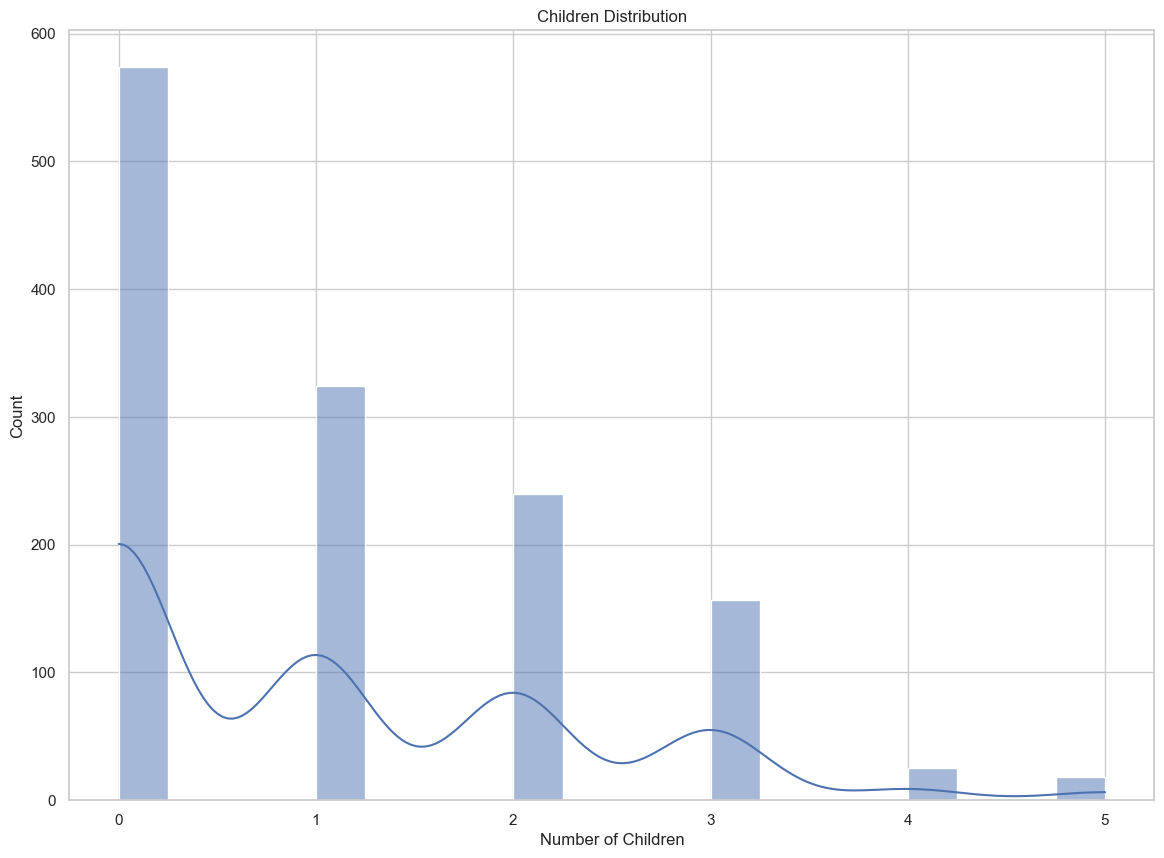

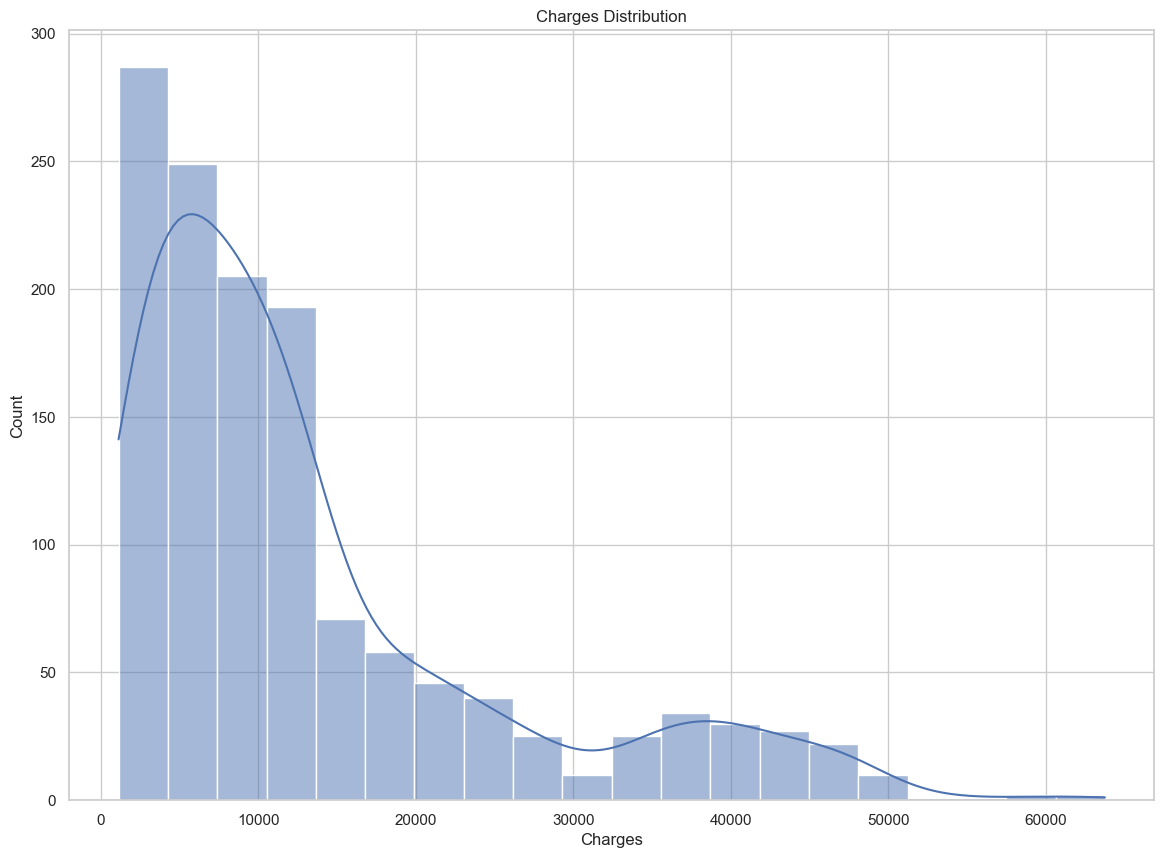

In [30]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize = (14, 10))
sns.histplot(Insurance['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# BMI Distribution
plt.figure(figsize = (14, 10))
sns.histplot(Insurance['bmi'], kde=True, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Children Distribution
plt.figure(figsize = (14, 10))
sns.histplot(Insurance['children'], kde=True, bins=20)
plt.title('Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

# Charges Distribution
plt.figure(figsize = (14, 10))
sns.histplot(Insurance['charges'], kde=True, bins=20)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

Đây là những thứ chúng ta có thể hiển nhiên suy ra từ các biểu đồ trên:

- Age Distribution: Hầu hết những người có bảo hiểm (chi trả chi phí bảo hiểm) có độ tuổi từ từ 20 tới 30, với một số ít trên 50 tuổi.

- BMI Distribution: Chỉ số BMI thì dường như được phân phối khá bình thường, chủ yếu tập trung vào 30. 

- Children Distribution: Một số lượng lớn người tham gia bảo hiểm thì không có con, tiếp theo đó là những người có 1 hoặc 2 con.

- Charges Distribution: Sự phân phối của 'charges' bị lệch phải, cho thấy hầu hết mọi người đều trả chi phí bảo hiểm thấp hơn, nhưng có một số người phải trả chi phí cao hơn rất nhiều.

Tiếp theo, hãy quan sát sự phân phối của các biến dữ liệu phân loại (sex, smoker, and region), sử dụng biểu đồ thanh.

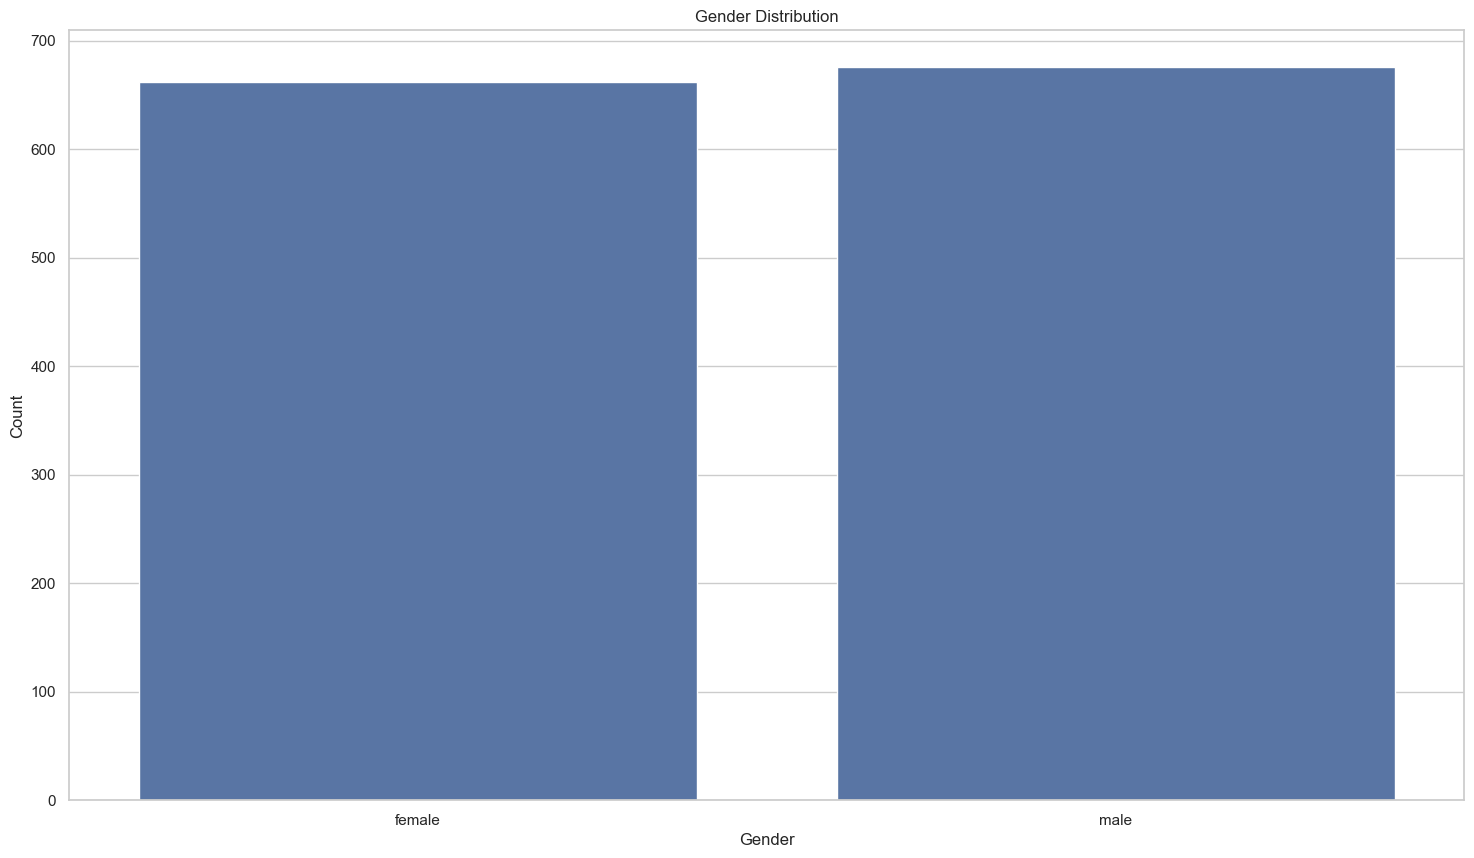

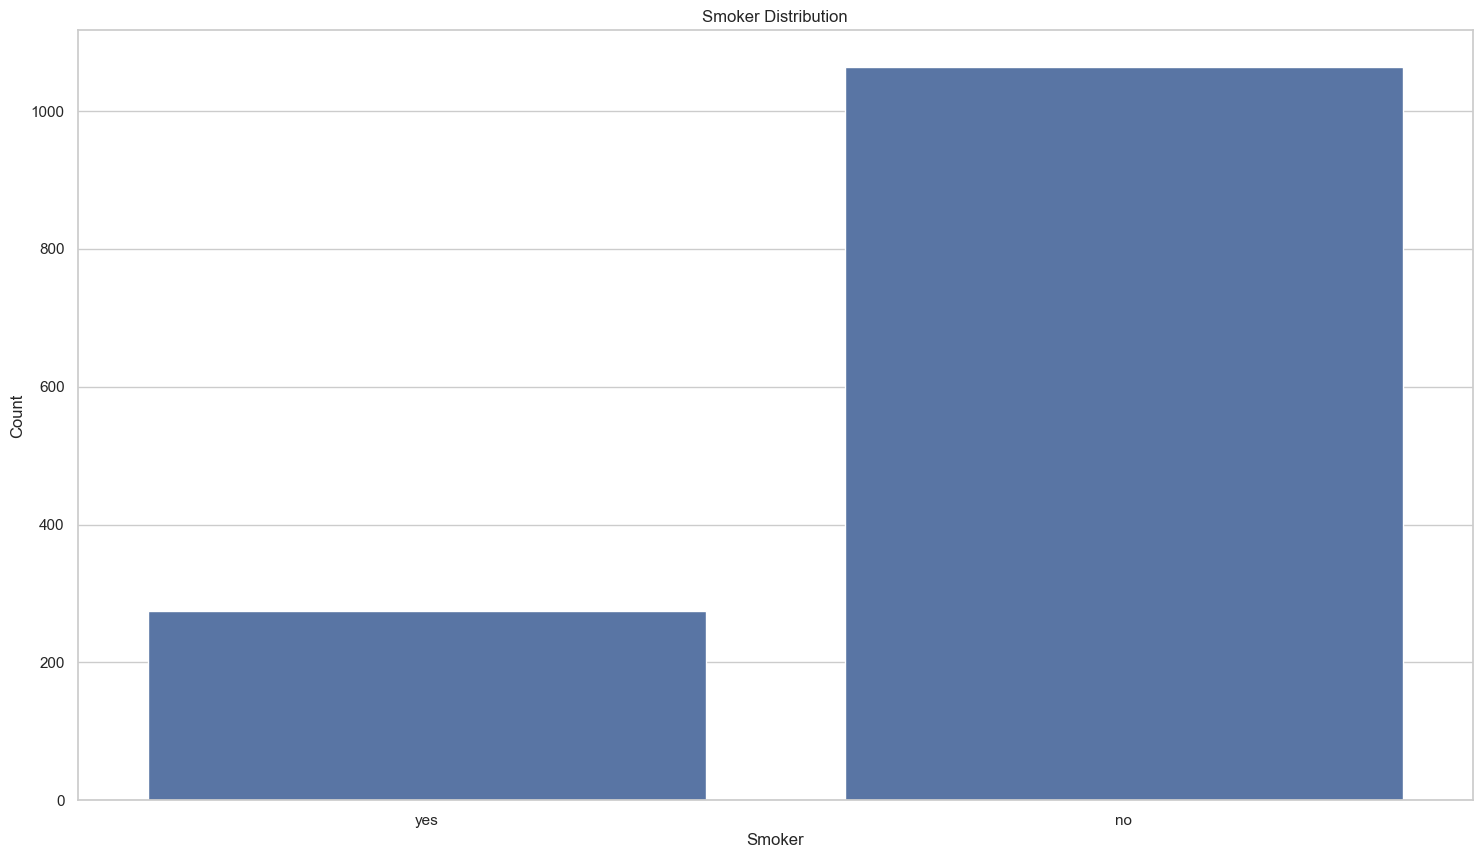

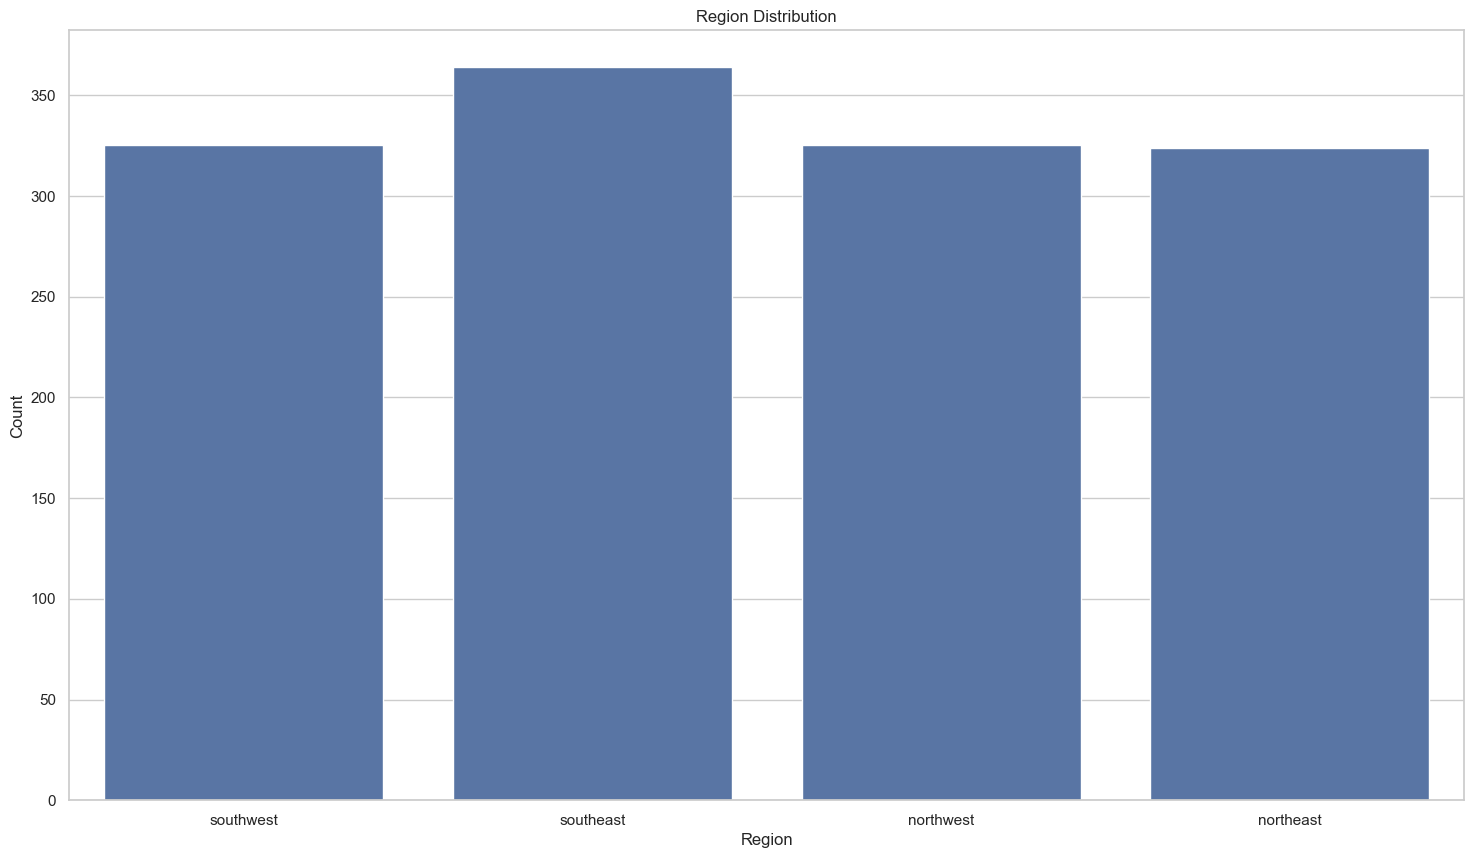

In [41]:
# figsize = (18, 10)
plt.figure(figsize = (18, 10))
sns.countplot(x='sex', data=Insurance)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Smoker Distribution
plt.figure(figsize = (18, 10))
sns.countplot(x='smoker', data=Insurance)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Region Distribution
plt.figure(figsize = (18, 10))
sns.countplot(x='region', data=Insurance)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


Các biểu đồ trên cho chúng ta thấy những điều sau:

- Gender Distribution: *Dataset* gần như là cân bằng giữa nam và nữ.

- Smoker Distribution: Số lượng người không hút thuốc cao hơn hẳn so với người có hút thuốc.

- Region Distribution: *Dataset* được phân bổ tương đối đồng đều trên bốn khu vực, trong đó có khu vực 'southeast' có mức độ cao hơn một chút.

Chúng ta đã có cái nhìn rõ ràng hơn về các đặc điểm riêng lẻ, bây giờ chúng ta sẽ phân tích hai biến để tìm hiểu mối quan hệ giữa các đặc điểm này và biến mục tiêu 'charges'.

**Bivariate Analysis**

Chúng ta sẽ bắt đầu bằng cách sử dụng đồ thị phân tán giữa các biến dữ liệu số và 'charges' để quan sát bất kỳ xu hướng hoặc mô hình nào. 

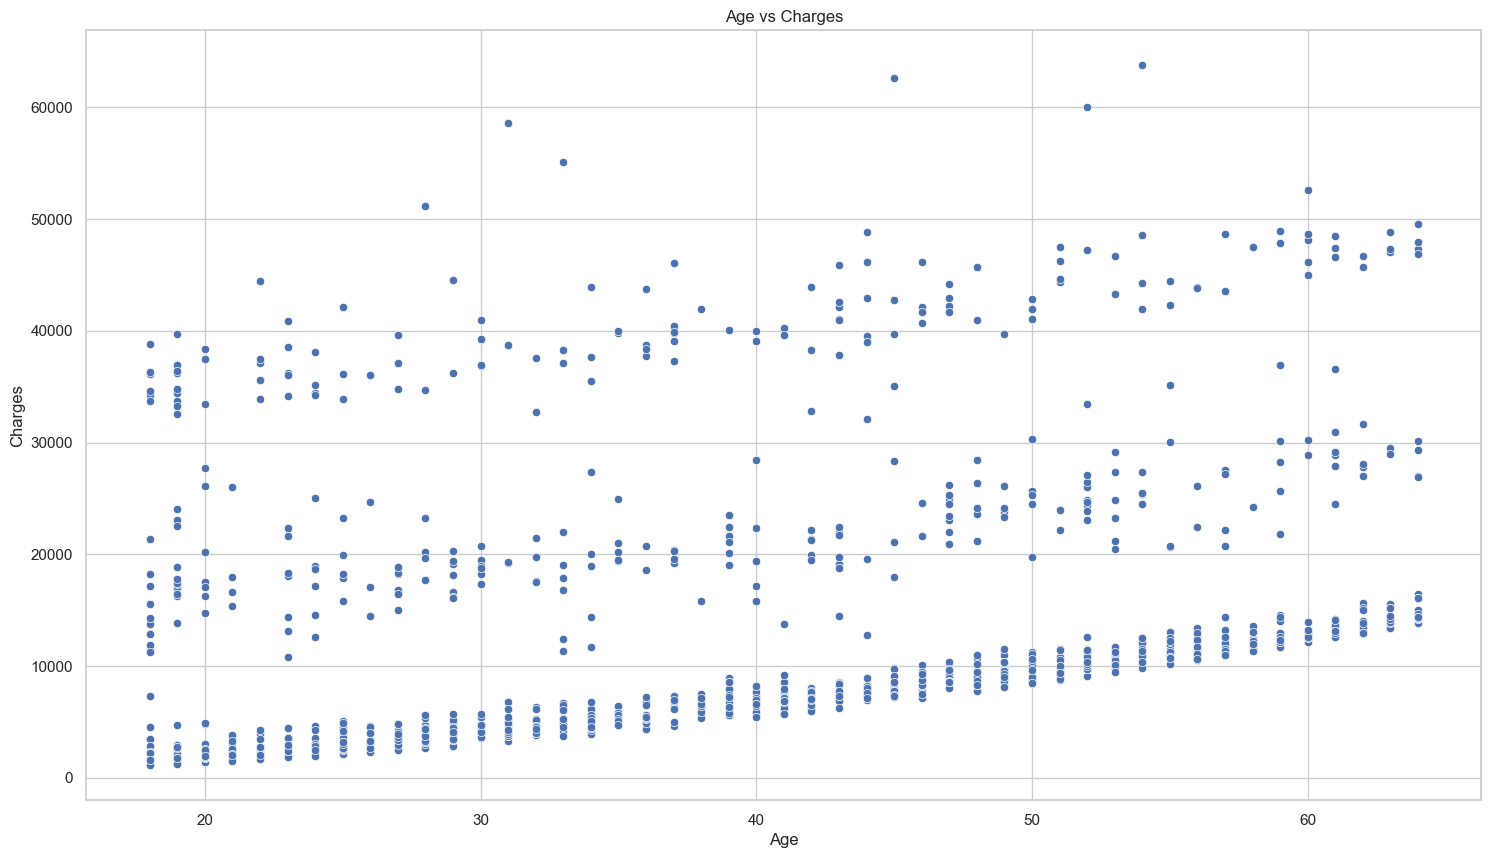

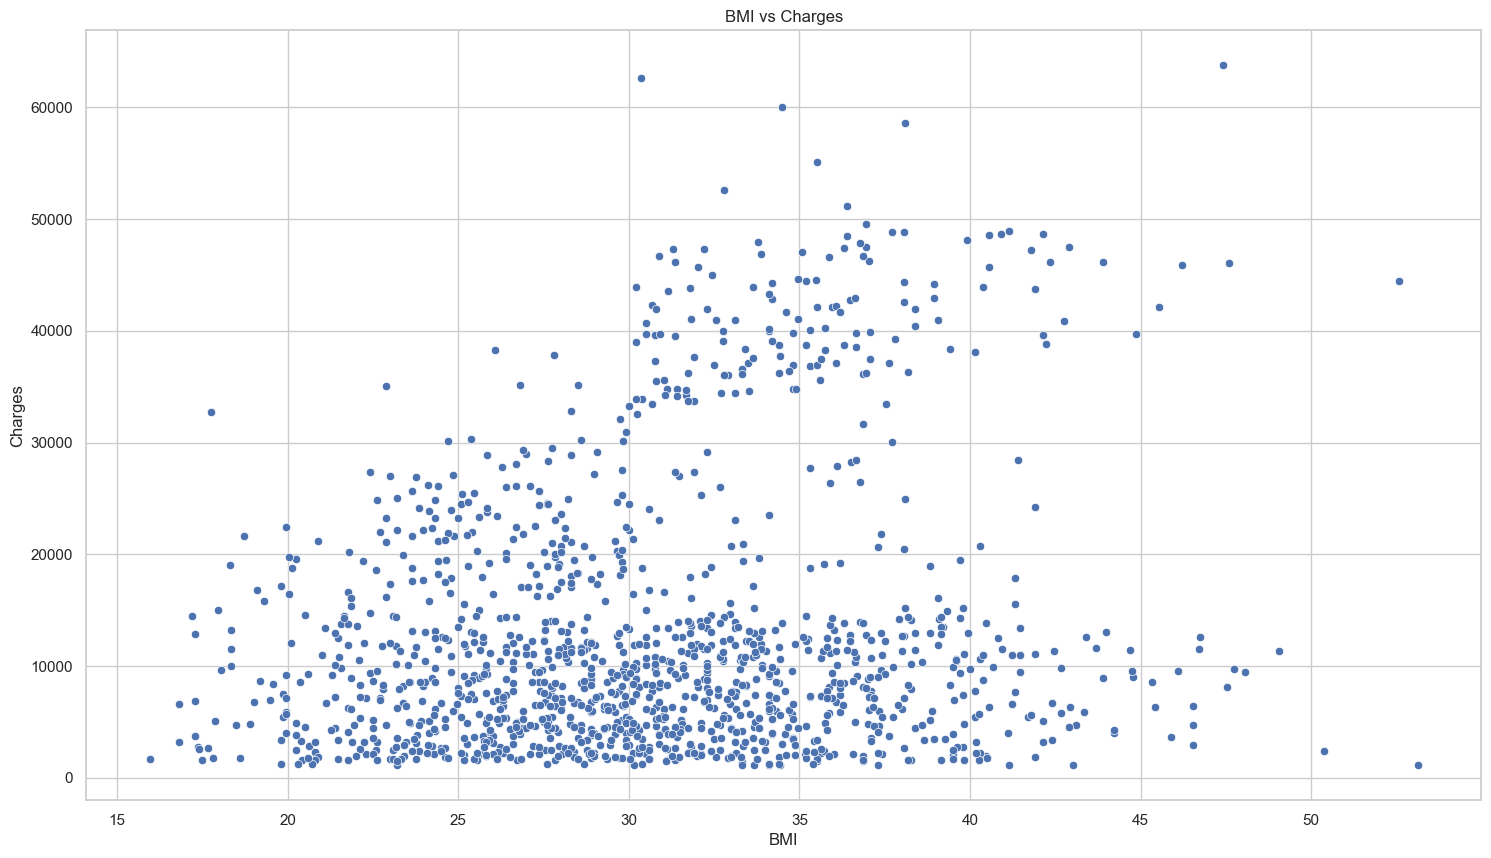

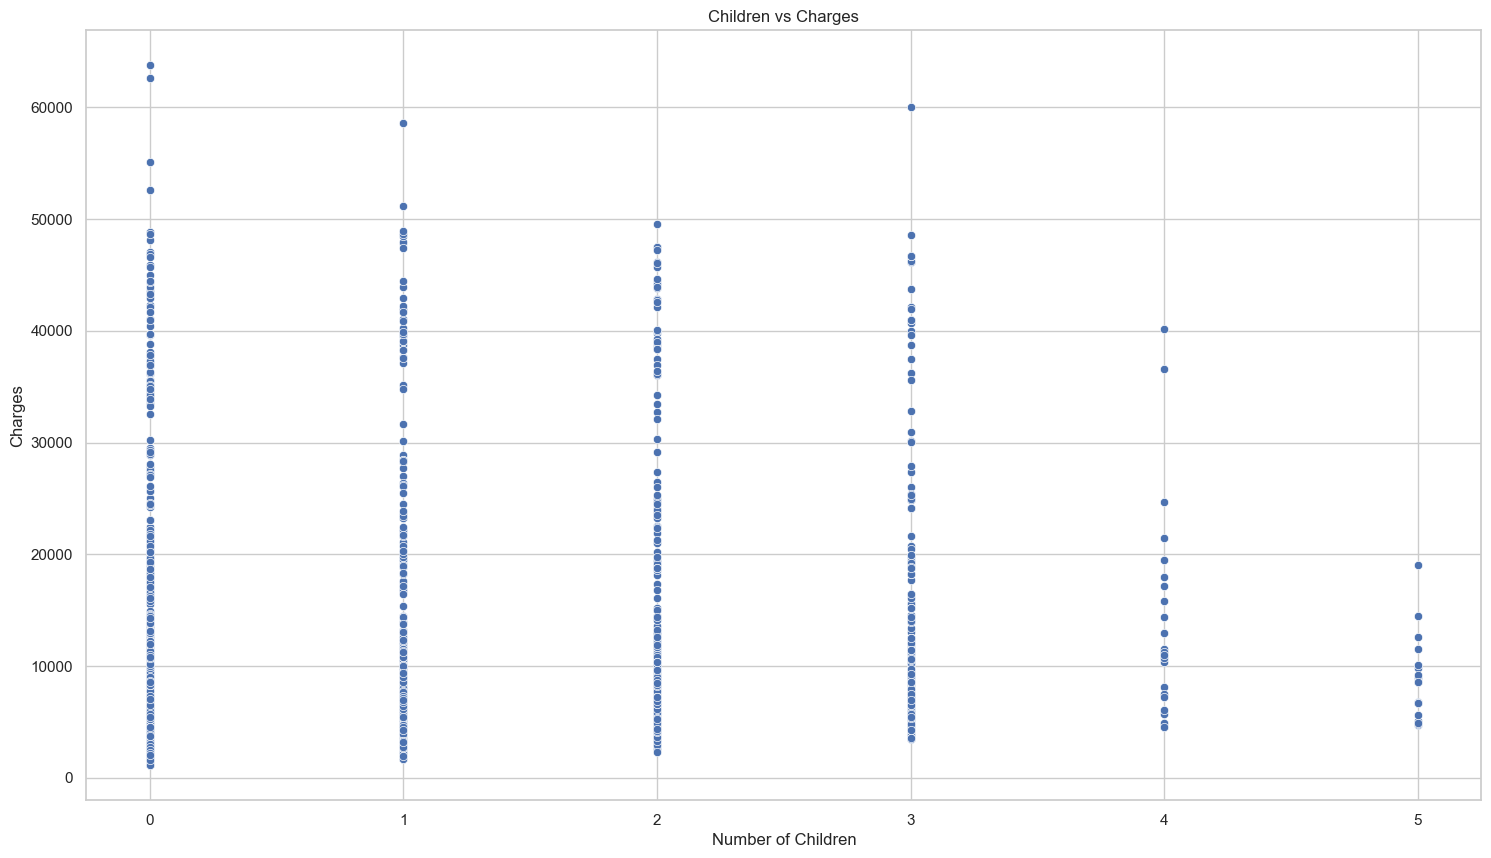

In [42]:
# Scatter plot for Age vs Charges
plt.figure(figsize = (18, 10))
sns.scatterplot(x='age', y='charges', data=Insurance)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Scatter plot for BMI vs Charges
plt.figure(figsize = (18, 10))
sns.scatterplot(x='bmi', y='charges', data=Insurance)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Scatter plot for Children vs Charges
plt.figure(figsize = (18, 10))
sns.scatterplot(x='children', y='charges', data=Insurance)
plt.title('Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


Dưới đây là những điều có thể suy ra từ đồ thị phân tán:

- Age vs Charges: Dường như có mối quan hệ tương quan dương giữa tuổi tác và chi phí, cho thấy những người lớn tuổi sẽ phải trả chi phí bảo hiểm cao hơn.

- BMI vs Charges: Chúng ta thấy có xu hướng chung cho thấy mức phí cao hơn đối với những người có chỉ số BMI cao hơn, mặc dù xu hướng này không được rõ ràng.

- Children vs Charges: Mối quan hệ giữa số lượng trẻ em và chi phí không rõ ràng lắm từ biểu đồ phân tán. Các khoản phí dường như được phân bổ theo phạm vi cho số lượng trẻ em khác nhau.


Tiếp theo, hãy quan sát mối quan hệ giữa các biến dữ liệu phân loại và 'charges'. Chúng ta sẽ sử dụng đồ thị boxplot cho điều này.

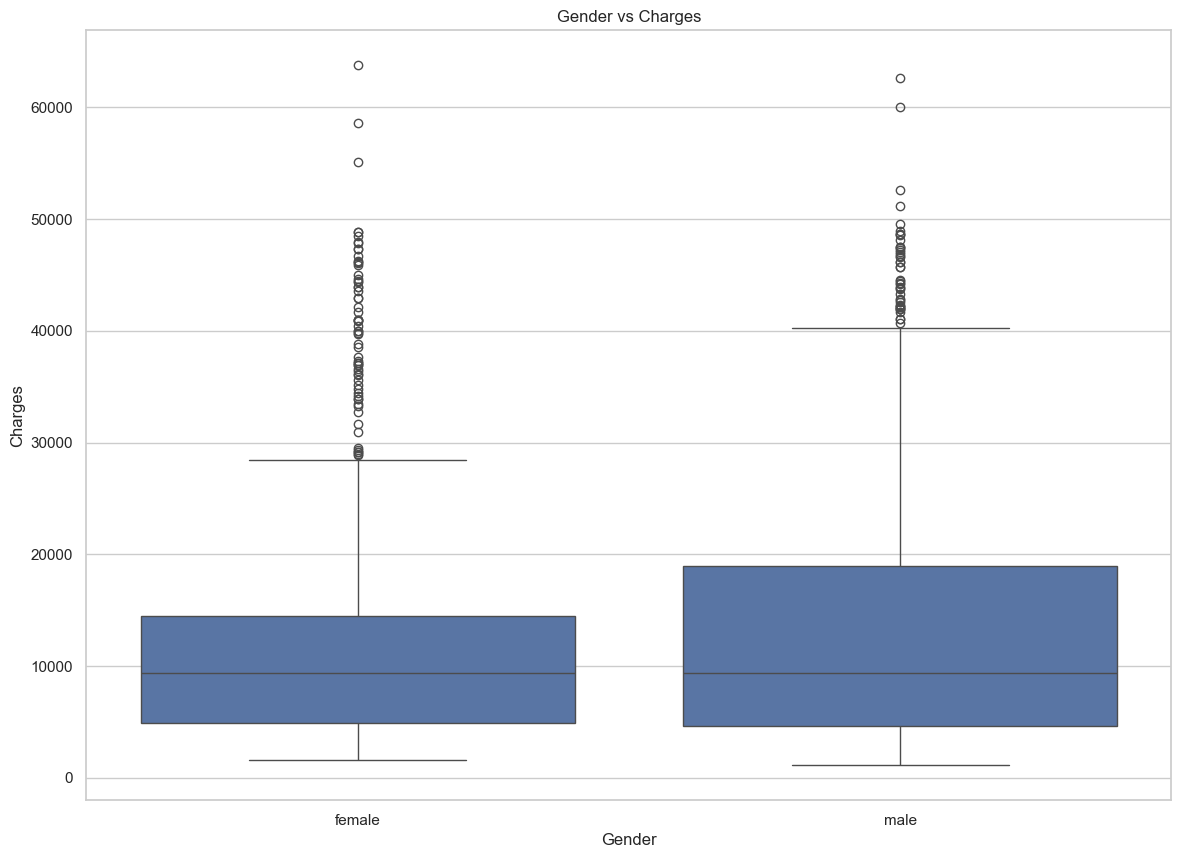

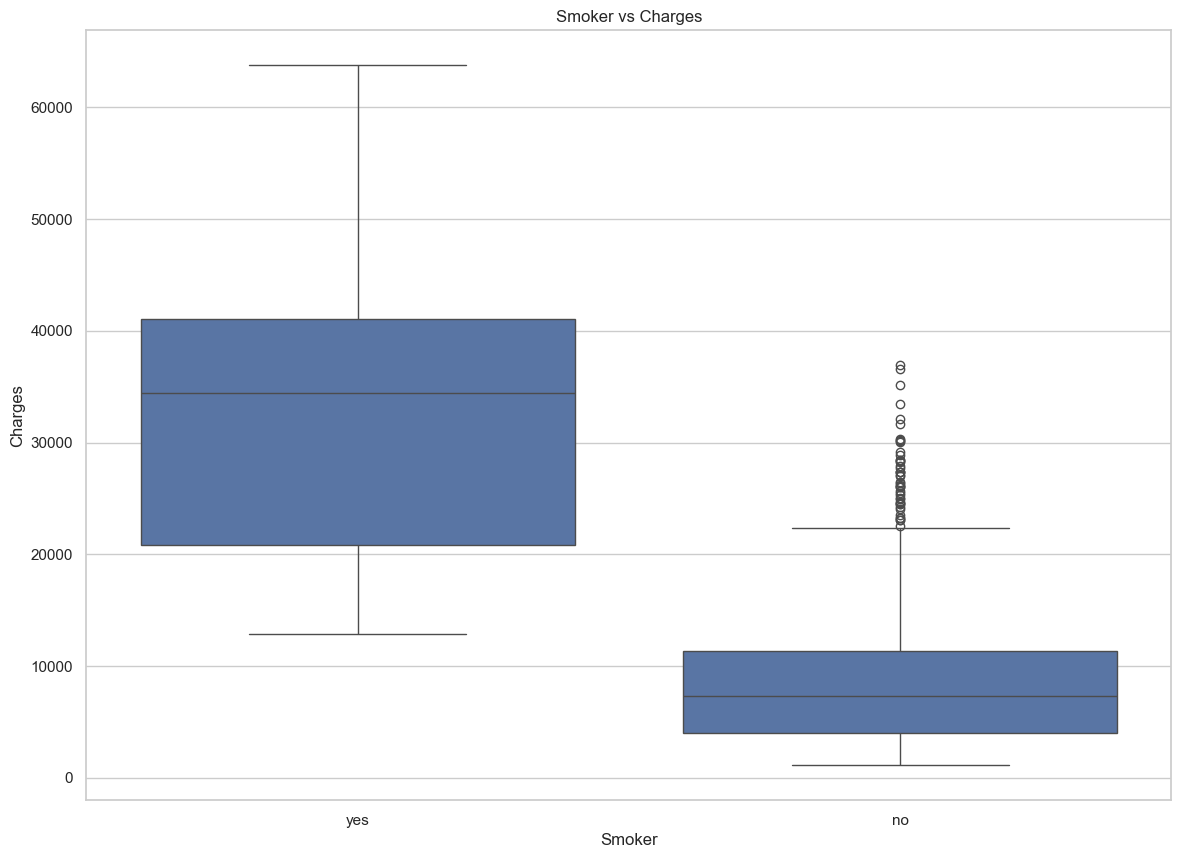

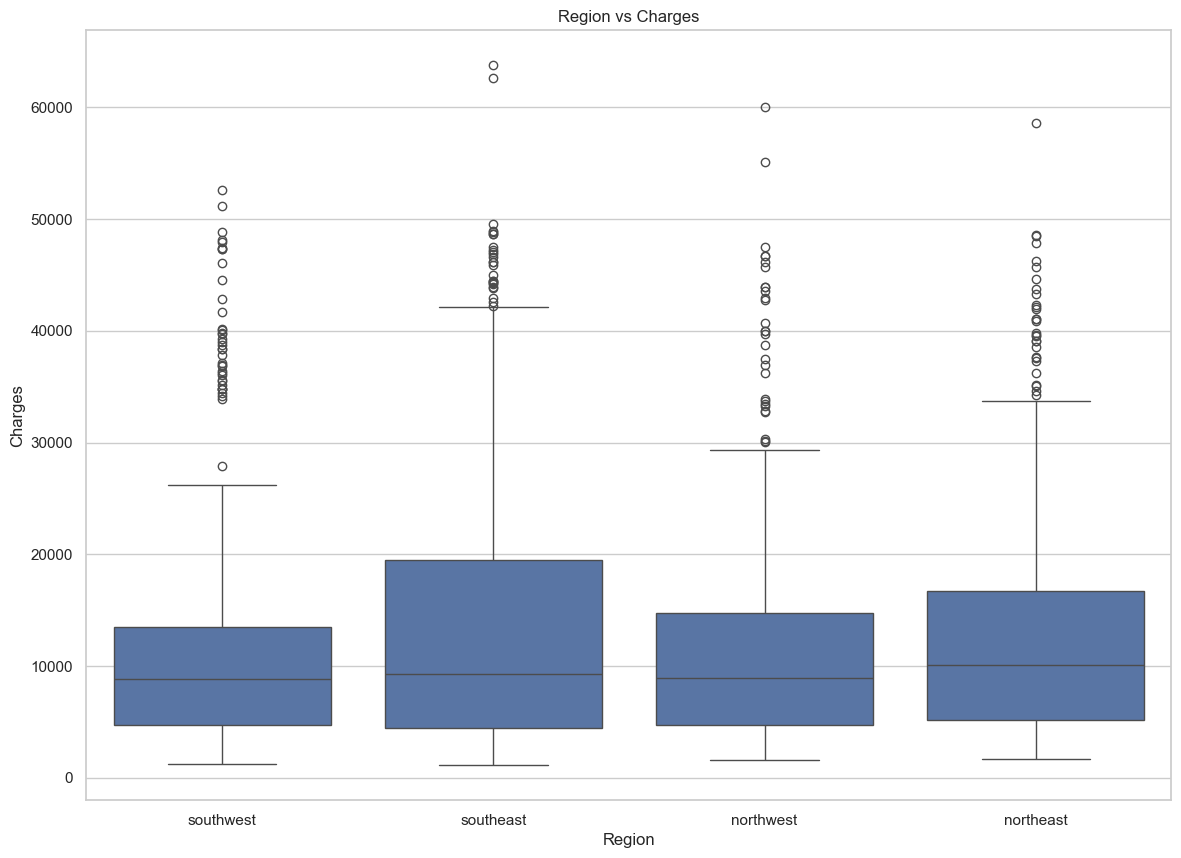

In [43]:
# Box plot for Gender vs Charges
plt.figure(figsize = (14, 10))
sns.boxplot(x='sex', y='charges', data=Insurance)
plt.title('Gender vs Charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

# Box plot for Smoker vs Charges
plt.figure(figsize = (14, 10))
sns.boxplot(x='smoker', y='charges', data=Insurance)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Box plot for Region vs Charges
plt.figure(figsize = (14, 10))
sns.boxplot(x='region', y='charges', data=Insurance)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


Đồ thị boxplots dẫn tới những điều sau:

- Gender vs Charges: Phí bảo hiểm trung bình khá giống nhau đối với cả hai giới, mặc dù nam giới dường như có mức phí cao hơn một chút.

- Smoker vs Charges: Có sự khác biệt đáng kể về phí giữa người hút thuốc và người không hút thuốc, và những người hút thuốc thường phải có mức phí bảo hiểm cao hơn nhiều.

- Region vs Charges: Các khoản phí dường như được phân bổ khá giống nhau ở các khu vực khác nhau, không có sự khác biệt đáng kể.

Phân tích dữ liệu đã cung cấp những tìm hiểu có giá trị về mối liên quan giữa các *feature* và *charges*. Bây giờ chúng ta có được cơ sở tốt hơn để xây dựng mô hình hồi quy tuyến tính nhằm dự đoán phí bảo hiểm. Bước tiếp theo, chúng ta sẽ chuẩn bị dữ liệu trước khi huấn luyện mô hình.


Trước khi xây dựng mô hình, hãy tóm tắt những cơ sở mà chúng ta có về các *feature* dựa trên phân tích dữ liệu mà chúng ta đã tìm hiểu ở trên.

1. Age: Tương quan thuận với 'charges', những người lớn tuổi có xu hướng trả chi phí cao hơn.

2. BMI: Nói chung, BMI cao hơn tương ứng với 'charges' cao hơn, mặc dù mối quan hệ này không phải là mối quan hệ tuyến tính.

3. Children: Số lượng trẻ em không có xu hướng rõ ràng nhưng vẫn có thể cung cấp một số cơ sở dự đoán.

4. Sex: Giới tính không cho thấy sự khác biệt đáng kể về 'charges' nhưng chúng ta sẽ đưa nó vào để có mô hình toàn diện hơn.

5. Smoker: Một yếu tố dự báo rất mạnh mẽ; người hút thuốc có 'charges' cao hơn nhiều.

6. Region: Các khoản phí được phân bổ khá đồng đều giữa các khu vực.

Dựa trên những điều trên, sau đây là lý do cơ sở để lựa chọn tính năng:

- Include: Age, BMI, Children, Smoker — những điều này đã cho thấy mối tương quan hoặc sự khác biệt về 'charges' trong phân tích dữ liệu.

- Conditional Include: Sex, Region — những điều này không thể hiện mối tương quan chặt chẽ nhưng có thể cải thiện hiệu suất của mô hình bằng cách nắm bắt các mẫu cơ bản.

**4. Data Pre-Processing**

Data pre-processing là kỹ thuật để làm sạch dữ liệu bất thường như giá trị bị thiếu, dữ liệu sai, định dạng dữ liệu sai, dữ liệu trùng lặp và các dữ liệu ngoại lệ. Trong *Dataset* này, chúng ta có thể quan sát thấy rằng không có giá trị bị thiếu và dữ liệu sai. Điều duy nhất chúng ta có thể cần để kiểm tra là có trùng lặp và có sự hiện diện của các ngoại lệ hay không.

In [44]:
data = Insurance.copy()
data.drop_duplicates(inplace=True)

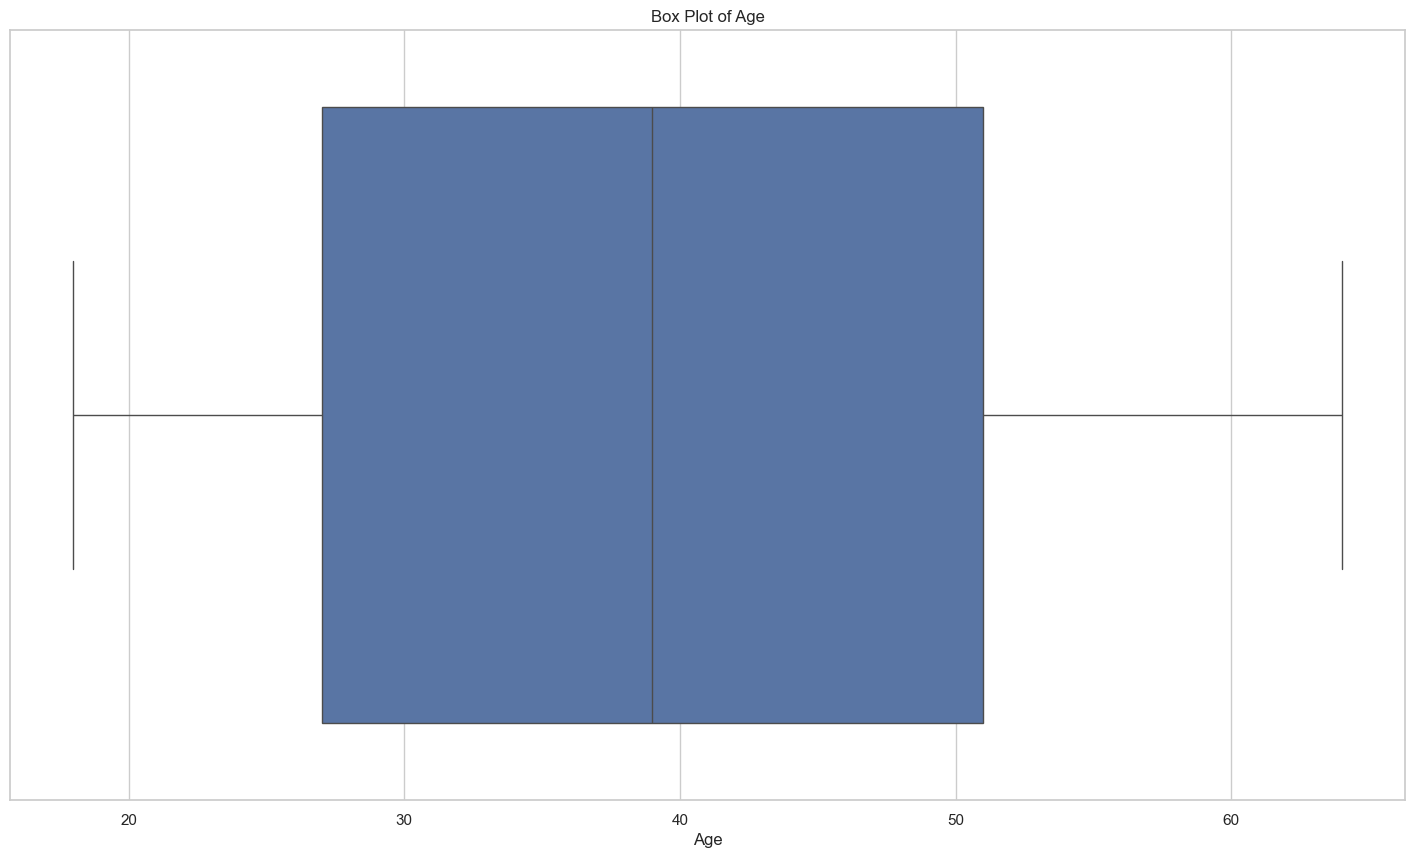

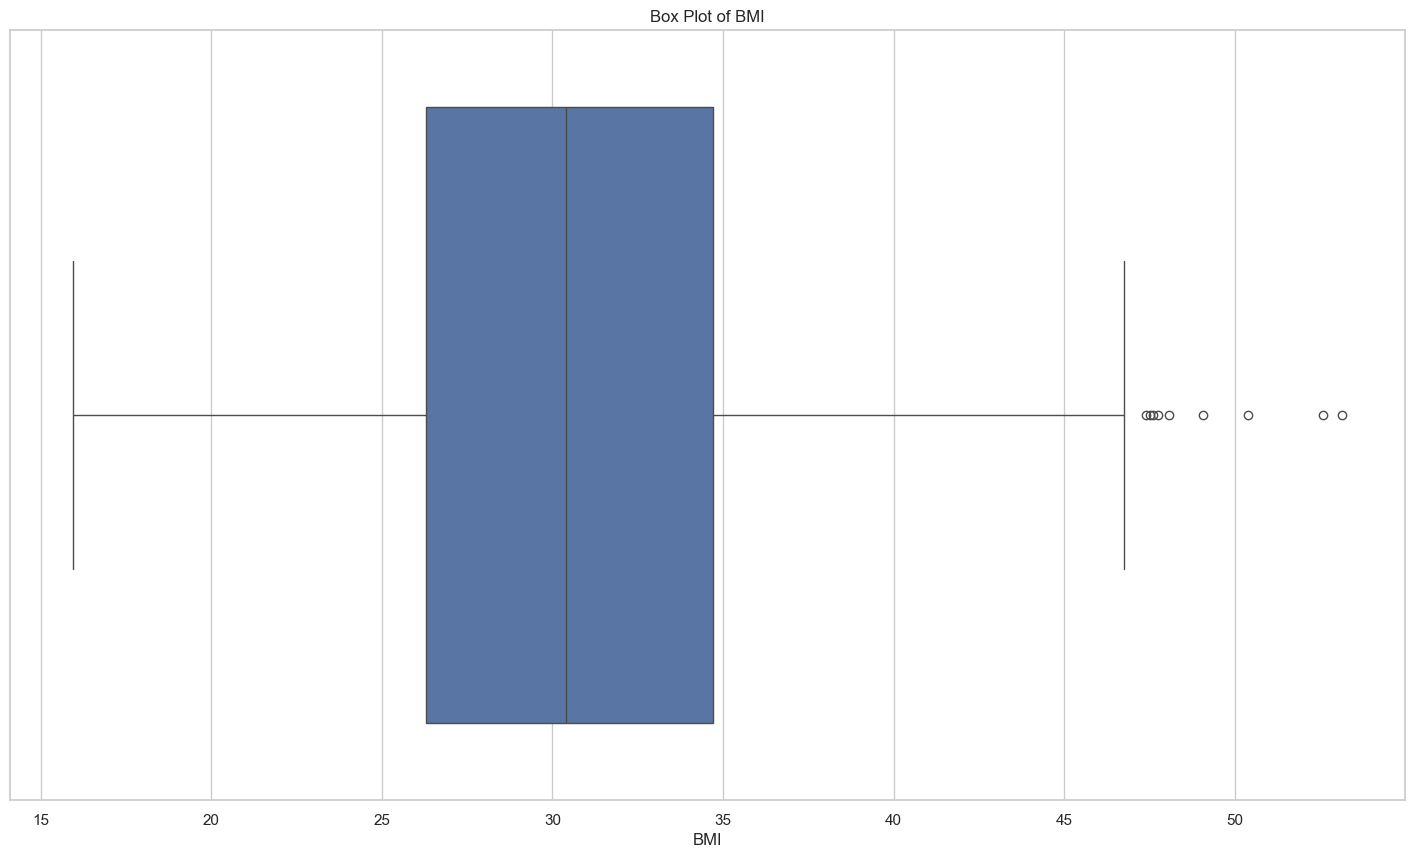

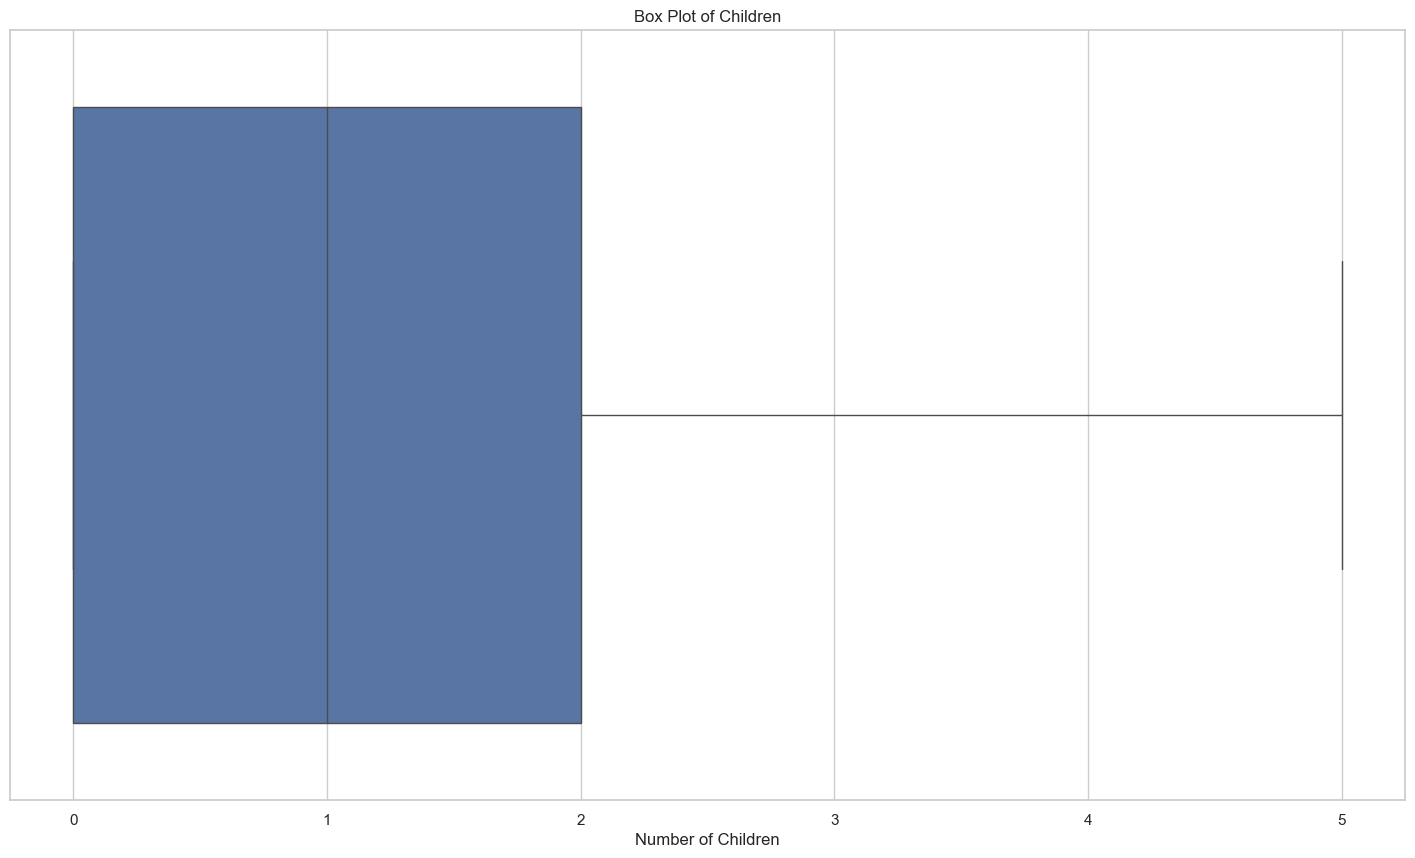

In [45]:
# Box plot for Age
plt.figure(figsize = (18, 10))
sns.boxplot(x='age', data=Insurance)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Box plot for BMI
plt.figure(figsize = (18, 10))
sns.boxplot(x='bmi', data=Insurance)
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

# Box plot for Children
plt.figure(figsize = (18, 10))
sns.boxplot(x='children', data=Insurance)
plt.title('Box Plot of Children')
plt.xlabel('Number of Children')
plt.show()


Do sự hiện diện của các giá trị ngoại lệ trong cột BMI, chúng ta cần xử lý các giá trị ngoại lệ bằng cách thay thế các giá trị bằng giá trị trung bình vì cột BMI bao gồm dữ liệu liên tục.

In [46]:
from feature_engine.outliers import ArbitraryOutlierCapper  

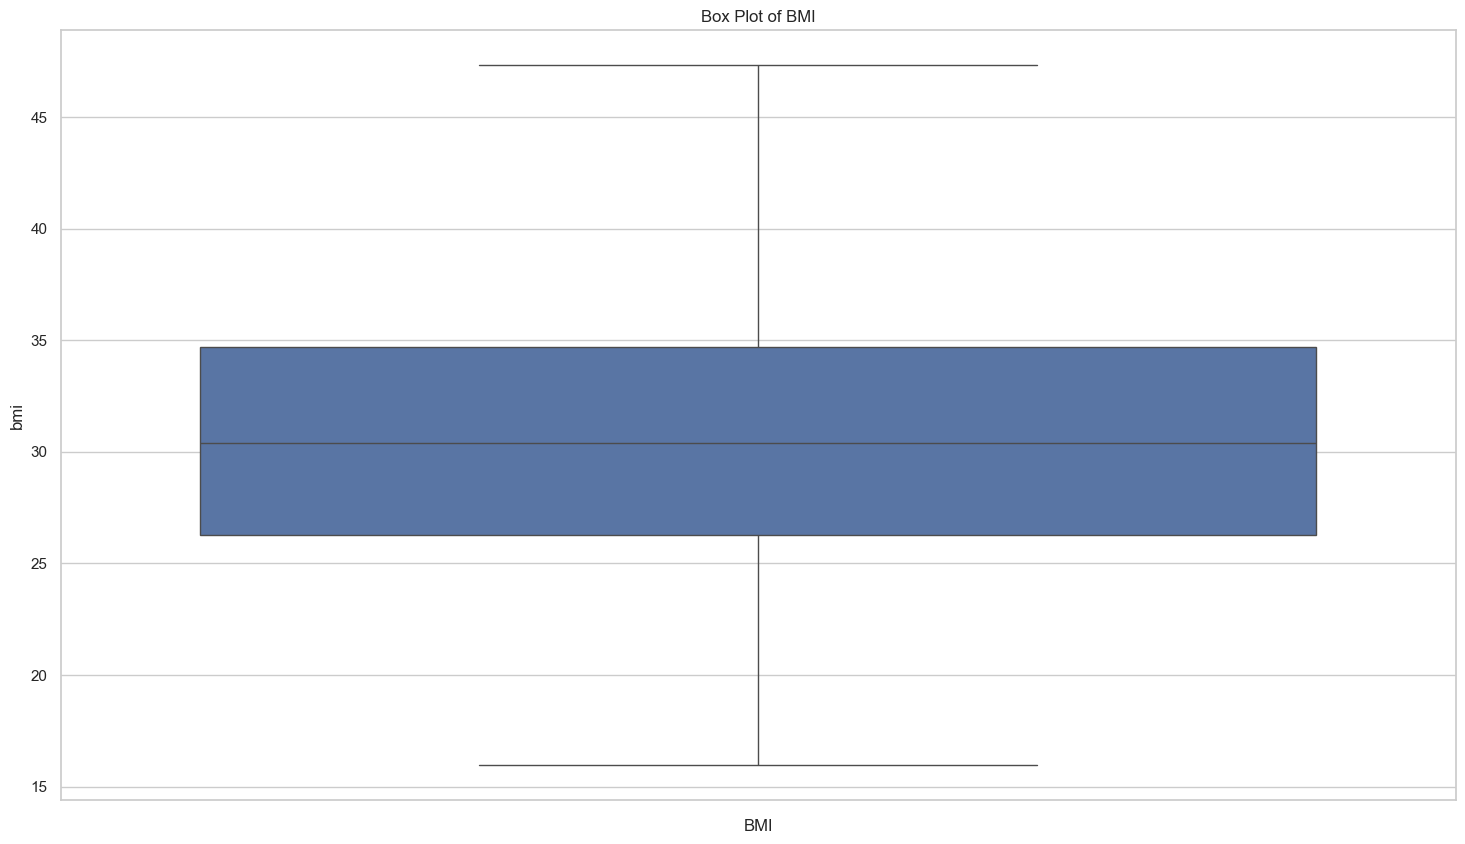

In [47]:
Q1 = data['bmi'].quantile(0.25)
Q2 = data['bmi'].quantile(0.5)
Q3 = data['bmi'].quantile(0.75)

iqr = Q3 - Q1
lowlim = Q1 - 1.5*iqr
upplim = Q3 + 1.5*iqr


arb = ArbitraryOutlierCapper(min_capping_dict = {'bmi':lowlim}, max_capping_dict = {'bmi':upplim})
data[['bmi']] = arb.fit_transform(data[['bmi']])
plt.figure(figsize = (18, 10))
sns.boxplot(data['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()


**Encoding**

Việc mã hóa sẽ được thực hiện cho dữ liệu phân loại riêng biệt (sex, bmi, region).

In [17]:
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


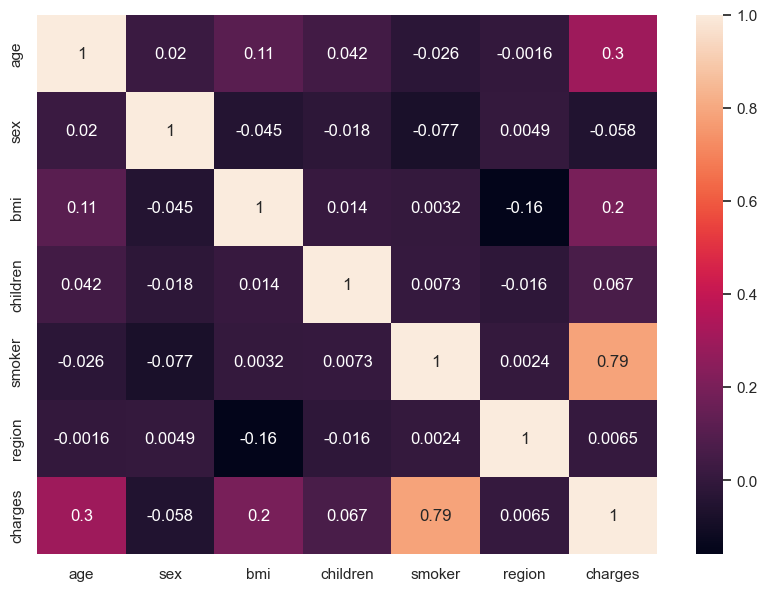

In [18]:
#Đồ thị hiển thị mối tương quan
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

**5. Model Development**


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [20]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.001626,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,0.004936,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,-0.157818,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.002358,0.787234
region,-0.001626,0.004936,-0.157818,-0.016258,0.002358,1.000000,0.006547
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.006547,1.000000


In [21]:
x = data.drop(['charges'], axis=1)
y = data[['charges']]

l1=[]
l2=[]
l3=[]

cvs=0

for i in range(40,50):
    
    xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2, random_state = i)
    lrmodel=LinearRegression()

    lrmodel.fit(xtrain,ytrain)

    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))

    cvs = (cross_val_score(lrmodel, x, y, cv=5,)).mean()
    l3.append(cvs)
    
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})

df1

,train acc,test acc,cvs
0,0.741989,0.778965,0.747233
1,0.756522,0.708109,0.747233
2,0.729813,0.806985,0.747233
3,0.754367,0.734187,0.747233
4,0.743264,0.780474,0.747233
5,0.753409,0.733273,0.747233
6,0.741423,0.777238,0.747233
7,0.731825,0.797602,0.747233
8,0.752463,0.741935,0.747233
9,0.757217,0.720649,0.747233


- Chúng ta đã xác định random_state tốt nhất cho *Dataset* này là 42. Bây giờ, chúng ta sửa random_state này lại thành 42.

- Chúng ta sẽ sử dụng mô hình *Machine Learning* 'LinearRegression' cho bài này.

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)


LinearRegression()

In [23]:
# prediction on training data
train_data_pred = lrmodel.predict(xtrain)
r2_train = metrics.r2_score(ytrain, train_data_pred)

print('R squared value: ',r2_train)

R squared value:  0.7298127441752071


In [24]:
# prediction on testing data
test_data_pred = lrmodel.predict(xtest)
r2_test = metrics.r2_score(ytest, test_data_pred)

print('R squared value: ',r2_test)

R squared value:  0.806985218019829


Text(0.5, 1.0, 'Residuals PDF')

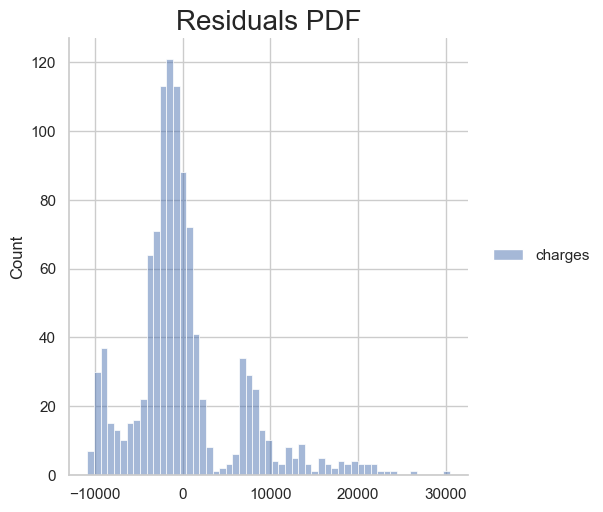

In [25]:
# Residual = Differences between the targets and the predictions
# The residuals are the estimate of errors
sns.displot(ytrain - train_data_pred)
plt.title('Residuals PDF', size = 20)

**6. Building a Predictive System**

In [26]:
new_data = {'age':50, 'sex':1, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(new_data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,1,25,2,1,2


In [27]:
cost_pred = lrmodel.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [[32829.42335012]]
